In [1]:
from pandas import Series, DataFrame
import pandas as pd
import re
pd.options.mode.chained_assignment = None  # default='warn'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fake = pd.read_csv("fake_job_postings.csv")

fake_cols = fake.columns.tolist()

fake_cols = fake_cols[-1:] + fake_cols[:-1]

fake = fake[fake_cols]

fraud = (fake['fraudulent'] == 1)


fake['fraudulent'].value_counts()
# 866 fraudulent annouces over 17014 jobs postings


fake_1 = fake[fraud]
fake_1

# Fraudulent annouces only

,fraudulent,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
98,1,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other
144,1,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
173,1,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other
180,1,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales
215,1,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,1,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN
17828,1,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN
17829,1,17830,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN
17830,1,17831,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing


In [3]:
fraud_sector = fake_1

fraud_sector_1= fraud_sector.groupby('industry').count().sort_values(by='fraudulent',ascending=False)

fraud_sector_cols = fraud_sector.columns.tolist()

fraud_sector_1[:10]

# Index announces by industry and count the characteristics of each announces




,fraudulent,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function
industry,,,,,,,,,,,,,,,,,
Oil & Energy,109,109,109,107,53,21,64,109,106,62,109,109,109,95,46,57,106
Accounting,57,57,57,57,27,30,11,57,47,36,57,57,57,57,49,43,54
Hospital & Health Care,51,51,51,50,8,5,4,51,8,6,51,51,51,51,16,12,19
Marketing and Advertising,45,45,45,45,25,14,22,45,44,36,45,45,45,45,39,42,41
Financial Services,35,35,35,34,9,15,26,35,35,35,35,35,35,35,29,31,33
Information Technology and Services,32,32,32,32,11,12,13,32,22,7,32,32,32,32,26,21,29
Telecommunications,26,26,26,25,17,13,10,26,21,21,26,26,26,26,24,24,25
Real Estate,24,24,24,24,13,12,12,24,24,24,24,24,24,24,13,12,13
Consumer Services,24,24,24,24,13,19,9,24,23,20,24,24,24,24,24,23,23


In [4]:
#fraud_sector_1.drop('industry'==0,axis=0)
# drop the line with the 0


866 - fraud_sector_1['fraudulent'].sum()


# 275 annouces don't have an industry and are fake announces, can see them with fillna(0)

275

In [5]:
# Compare fraud data with non fraud data to find a pattern in fraud to select the features


non_fraud = (fake['fraudulent'] == 0)

sector_non_fraud = fake[non_fraud].groupby('industry').count().sort_values(by='fraudulent',ascending=False)

sector_non_fraud
# here read fraudulent as non fraudulent


# It seems like there is a huge proportion of fake announce in Oil&energy / Accounting / 

#And a signicative amount of fake annnouces in hospital and health care, marketing and advertising,
# financial services, information and technology





,fraudulent,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function
industry,,,,,,,,,,,,,,,,,
Information Technology and Services,1702,1702,1702,1686,684,445,1349,1702,1523,979,1702,1702,1702,1693,1438,1173,1498
Computer Software,1371,1371,1371,1359,559,261,1184,1371,1223,935,1371,1371,1371,1360,1139,915,1183
Internet,1062,1062,1062,1048,569,233,939,1062,1012,860,1062,1062,1062,1051,942,739,975
Education Management,822,822,822,822,23,24,802,822,810,781,822,822,822,822,259,806,307
Marketing and Advertising,783,783,783,776,373,174,680,783,679,528,783,783,783,778,652,506,673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Shipbuilding,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1
Museums and Institutions,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
Alternative Dispute Resolution,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1


In [6]:
# Comparing the two table, we can already choose the sector as a good indicator. 

# Job id and title are present in the fraudulous 

data_merged = sector_non_fraud.merge(fraud_sector_1,left_on='industry',right_on='industry')

data_merged_1 = data_merged.rename({'fraudulent_x':'non_fraudulent_x'},axis=1)

data_merged_1




,non_fraudulent_x,job_id_x,title_x,location_x,department_x,salary_range_x,company_profile_x,description_x,requirements_x,benefits_x,...,description_y,requirements_y,benefits_y,telecommuting_y,has_company_logo_y,has_questions_y,employment_type_y,required_experience_y,required_education_y,function_y
industry,,,,,,,,,,,,,,,,,,,,,
Information Technology and Services,1702,1702,1702,1686,684,445,1349,1702,1523,979,...,32,22,7,32,32,32,32,26,21,29
Computer Software,1371,1371,1371,1359,559,261,1184,1371,1223,935,...,5,5,2,5,5,5,5,5,5,5
Marketing and Advertising,783,783,783,776,373,174,680,783,679,528,...,45,44,36,45,45,45,45,39,42,41
Financial Services,744,744,744,740,160,121,641,744,684,504,...,35,35,35,35,35,35,35,29,31,33
Hospital & Health Care,446,446,446,445,109,67,380,446,383,299,...,51,8,6,51,51,51,51,16,12,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Public Safety,6,6,6,5,4,0,6,6,6,4,...,1,1,1,1,1,1,1,1,1,1
Executive Office,6,6,6,6,4,0,5,6,6,4,...,2,2,2,2,2,2,2,1,1,2
Investment Management,5,5,5,5,4,0,5,5,5,2,...,1,1,1,1,1,1,1,1,1,1


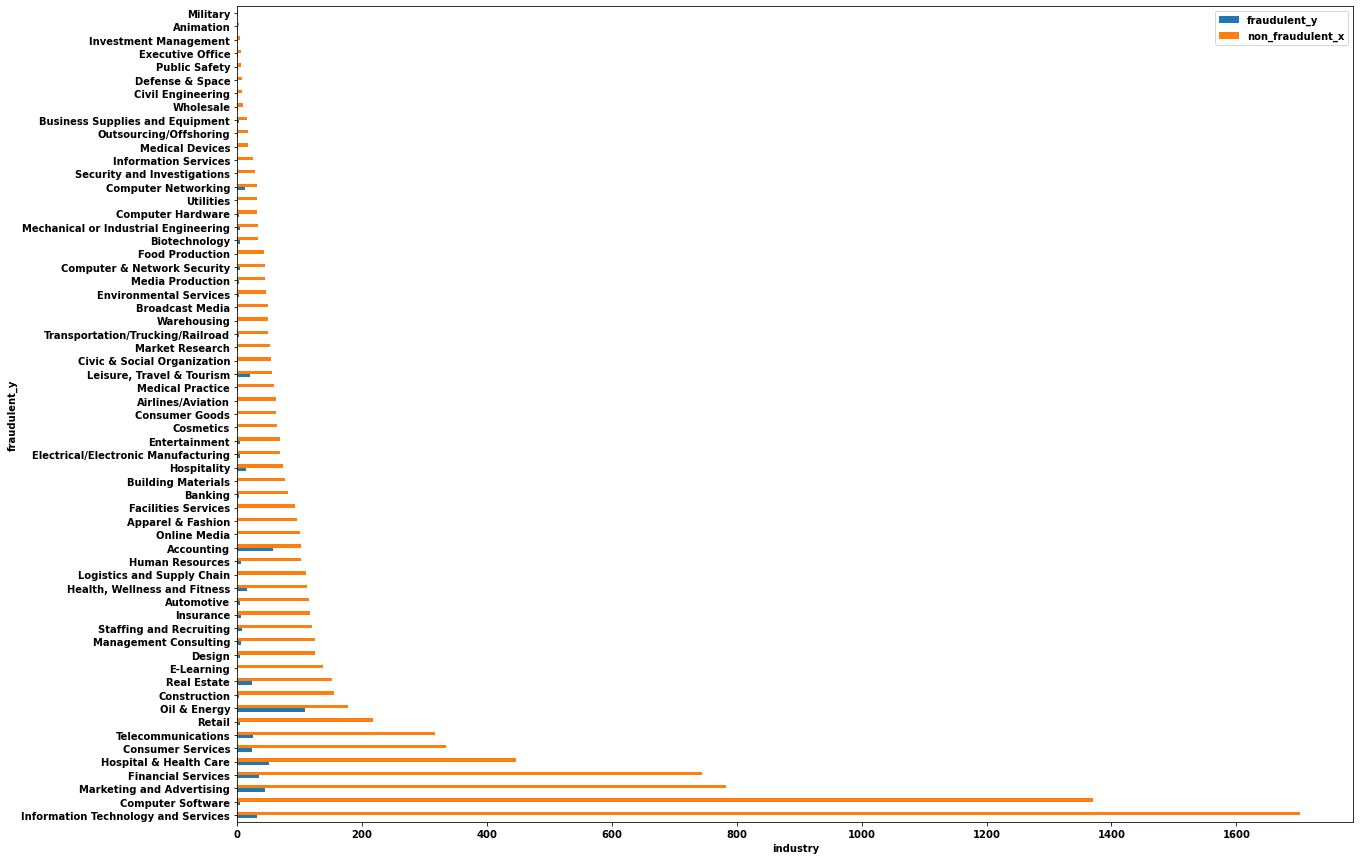

In [7]:
#non normalized data


data_merged_2 = data_merged_1.reset_index()



data_merged_2.plot( x= 'industry',y=['fraudulent_y','non_fraudulent_x'], kind='barh')
xlabel('industry')
ylabel('fraudulent_y')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 15)
fig.savefig('test2png.png', dpi=100)











In [8]:
#Normalized data


normalized_data_merged_1=(data_merged_1-data_merged_1.mean())/data_merged_1.std()
normalized_data_merged_2 = normalized_data_merged_1.reset_index()

normalized_data_merged_2


,industry,non_fraudulent_x,job_id_x,title_x,location_x,department_x,salary_range_x,company_profile_x,description_x,requirements_x,...,description_y,requirements_y,benefits_y,telecommuting_y,has_company_logo_y,has_questions_y,employment_type_y,required_experience_y,required_education_y,function_y
0,Information Technology and Services,5.210566,5.210566,5.210566,5.204674,5.215359,5.959238,4.930624,5.210566,5.217473,...,1.235003,0.846311,0.063523,1.235003,1.235003,1.235003,1.361541,1.776462,1.294446,1.272670
1,Computer Software,4.097905,4.097905,4.097905,4.096151,4.177135,3.299630,4.263562,4.097905,4.089937,...,-0.258426,-0.199725,-0.376809,-0.258426,-0.258426,-0.258426,-0.245956,-0.140680,-0.112435,-0.182946
2,Marketing and Advertising,2.121335,2.121335,2.121335,2.119793,2.632256,2.042098,2.225991,2.121335,2.045338,...,1.954062,2.200005,2.617448,1.954062,1.954062,1.954062,2.135520,2.963265,3.140977,2.000478
3,Financial Services,1.990236,1.990236,1.990236,1.997754,0.863122,1.276015,2.068322,1.990236,2.064130,...,1.400940,1.646221,2.529381,1.400940,1.400940,1.400940,1.540151,2.050340,2.173747,1.515272
4,Hospital & Health Care,0.988505,0.988505,0.988505,0.997710,0.439526,0.495478,1.013152,0.988505,0.932836,...,2.285935,-0.015131,-0.024543,2.285935,2.285935,2.285935,2.492742,0.863537,0.503075,0.666163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Public Safety,-0.490561,-0.490561,-0.490561,-0.493881,-0.432582,-0.472967,-0.498855,-0.490561,-0.484101,...,-0.479675,-0.445852,-0.464875,-0.479675,-0.479675,-0.479675,-0.484103,-0.505850,-0.464155,-0.425549
57,Executive Office,-0.490561,-0.490561,-0.490561,-0.490491,-0.432582,-0.472967,-0.502898,-0.490561,-0.484101,...,-0.424362,-0.384320,-0.376809,-0.424362,-0.424362,-0.424362,-0.424566,-0.505850,-0.464155,-0.364898
58,Investment Management,-0.493922,-0.493922,-0.493922,-0.493881,-0.432582,-0.472967,-0.502898,-0.493922,-0.487860,...,-0.479675,-0.445852,-0.464875,-0.479675,-0.479675,-0.479675,-0.484103,-0.505850,-0.464155,-0.425549
59,Animation,-0.500645,-0.500645,-0.500645,-0.500661,-0.457500,-0.472967,-0.515026,-0.500645,-0.495376,...,-0.424362,-0.384320,-0.552941,-0.424362,-0.424362,-0.424362,-0.424566,-0.414558,-0.552086,-0.364898


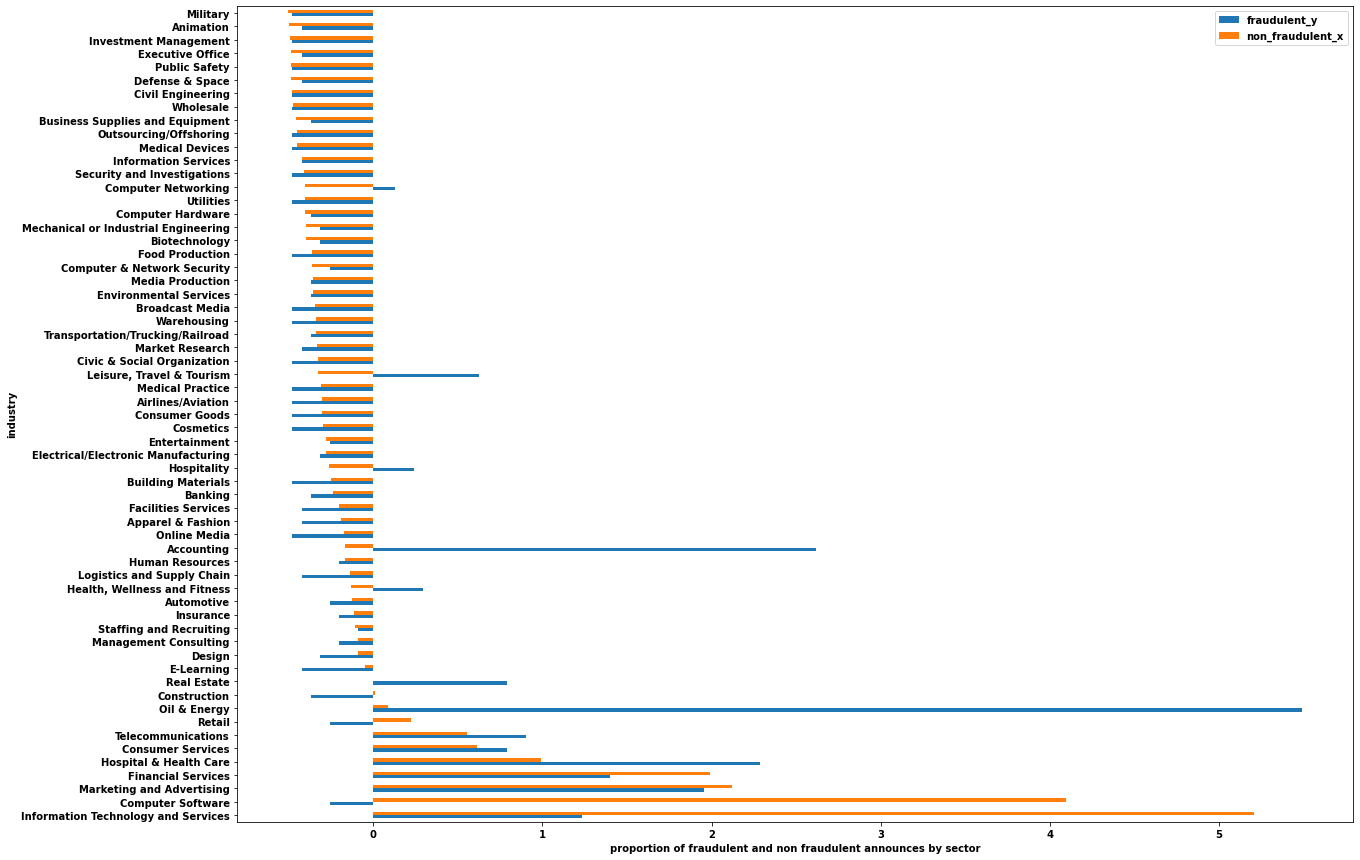

In [9]:

import statsmodels.api as sm
from patsy import dmatrices

# First data visualisation on the fake annnouces to choose features for Simple linear regression 
# on the training sample including fake and real announces

normalized_data_merged_2.plot( x= 'industry',y=['fraudulent_y','non_fraudulent_x'], kind='barh')
xlabel('proportion of fraudulent and non fraudulent announces by sector')
ylabel('industry')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 15)
fig.savefig('test2png.png', dpi=100)

# Too highlight the sector with the biggest proportion of fake announces 

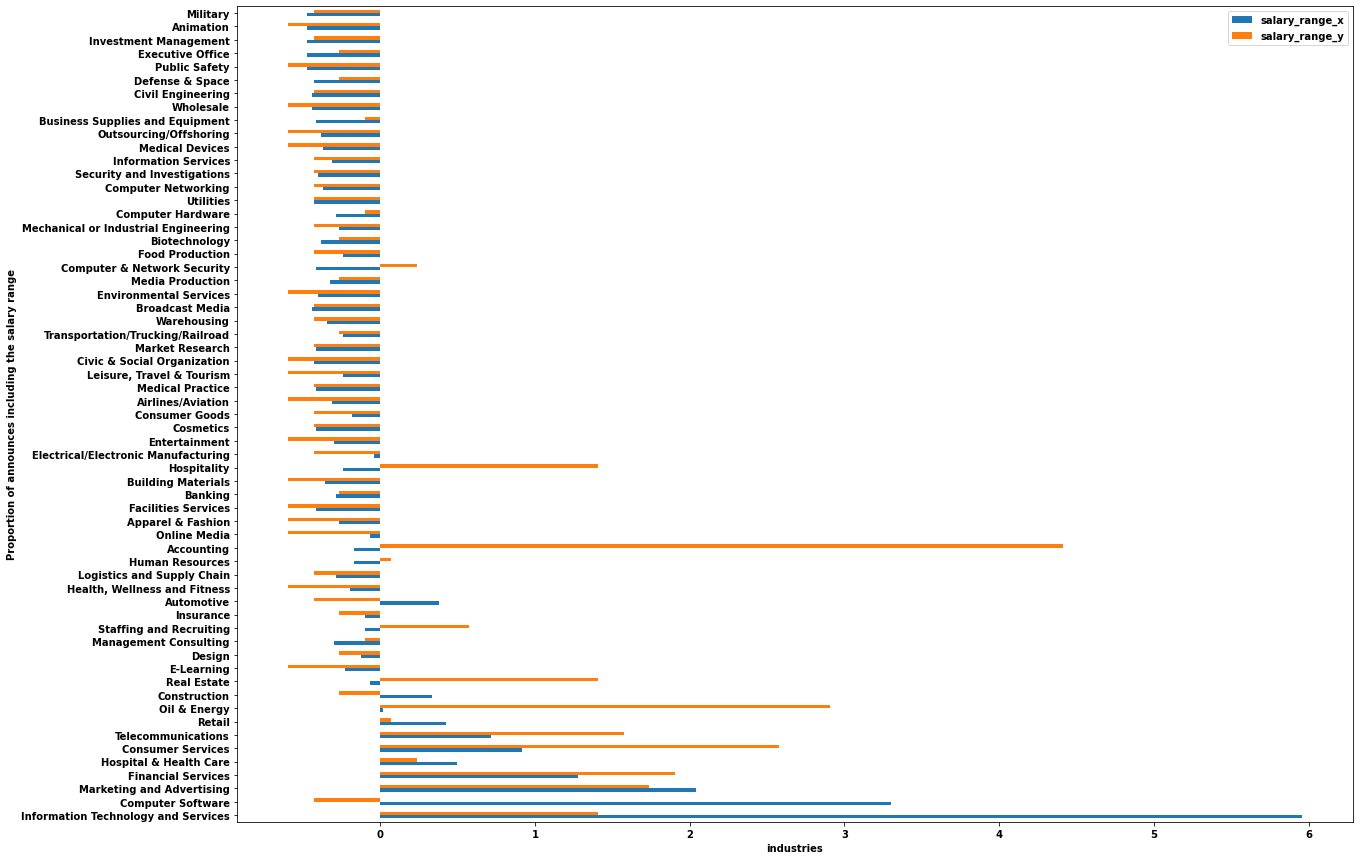

In [10]:
# Second plot 


normalized_data_merged_2.plot( x='industry',y=['salary_range_x','salary_range_y'], kind='barh')
xlabel('industries')
ylabel('Proportion of announces including the salary range')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 15)
fig.savefig('test2png.png', dpi=100)

# Fraudulent announces tend to put the price range more often to attract (maybe go deeper checking at which range)




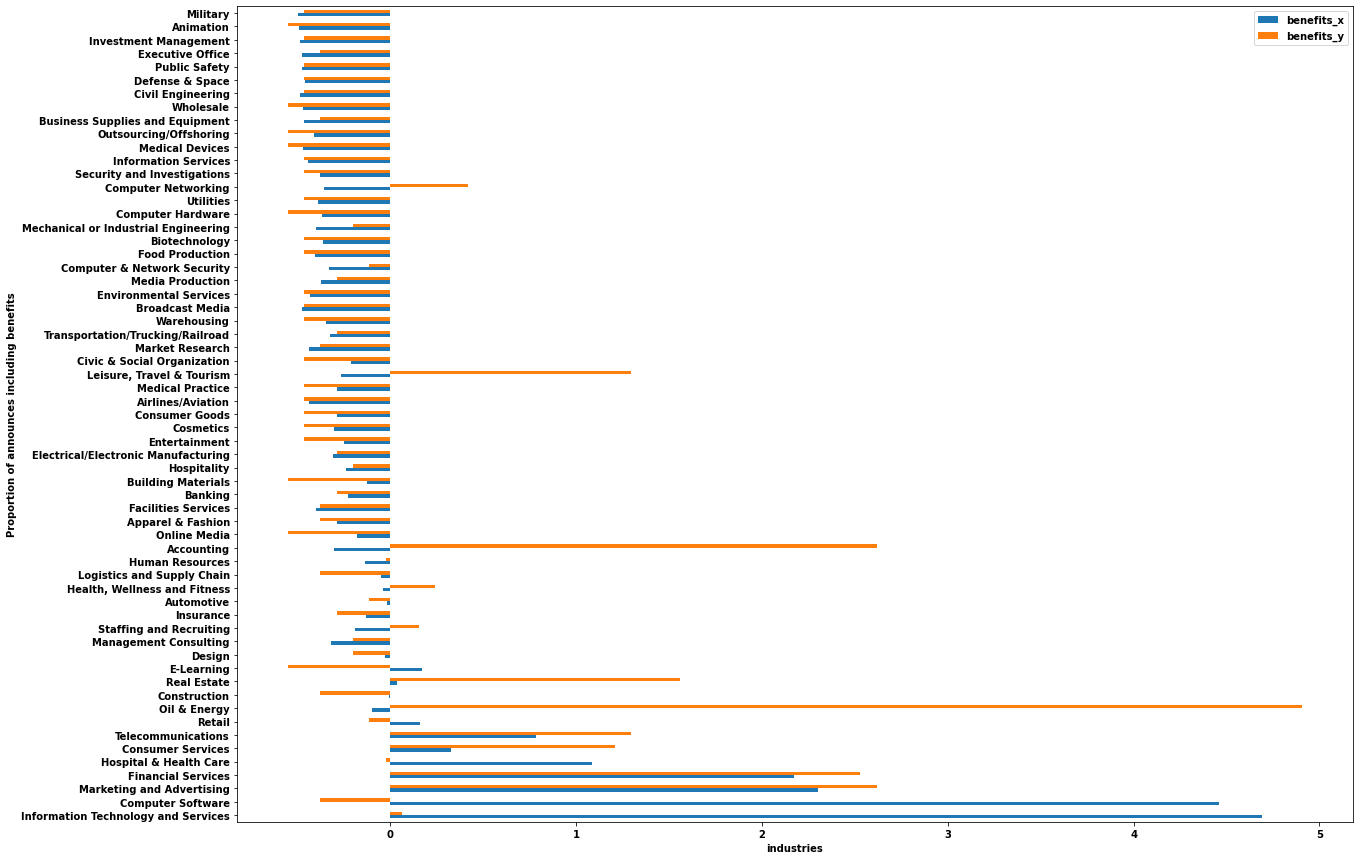

In [11]:
normalized_data_merged_2.plot( x='industry',y=['benefits_x','benefits_y'], kind='barh')
xlabel('industries')
ylabel('Proportion of announces including benefits')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 15)
fig.savefig('test2png.png', dpi=100)

# Fake announces seems to show the benefits more often